**Problem 1**
The file **prob1.txt** below contains a mystery signal that was recorded after convolution with an
instrument whose response function has the form

$$
g(t)=\left\{\begin{array}{ll}0 & t<0 \\ \alpha\,e^{-\alpha\,t} & t\geq 0\end{array}\right.
$$

The sample rate was $10^3$ samples/s and the instrument response time constant,
$\tau=\alpha^{-1}$ was 0.1 s. Use the convolution theorem

$$
\mathcal{F}[f*g]=\mathcal{F}[f]\times \mathcal{F}[g]
$$

(where $\mathcal{F}[f]$ represents the Fourier transform of) to deduce the original signal. Prepare

a plot with a properly labeled time axis.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [7]:
# import the data
data = np.loadtxt('prob1.txt')

# define g(t)
def g(t, alpha):
    if t<0:
        return 0
    else:
        return alpha*np.exp(-alpha*t)
    
# define the constants
tau = 0.1
alpha = 1/tau
sample_rate = 1/1000

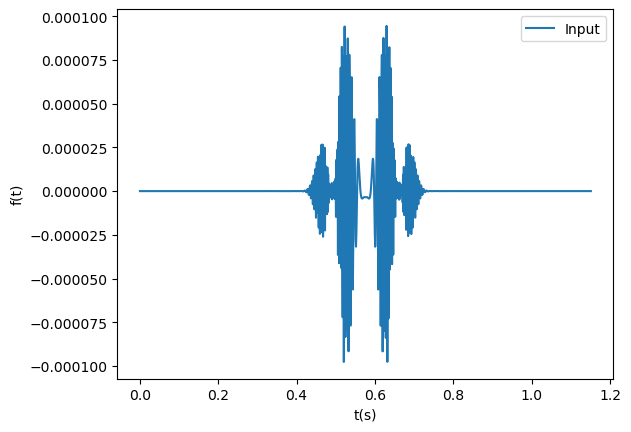

In [20]:
# create the time array
t = np.linspace(0, sample_rate * len(data), len(data))

# calculate Fourier transform of g(t)
G = np.fft.fft([g(i, alpha) for i in t])
G = np.fft.fftshift(G)

# calculate Fourier transform of input using convolution theorem
F = data/G

# calculate original signal
f = np.fft.ifft(F)
f = np.fft.fftshift(f)

# plot the results
plt.figure()
plt.plot(t, f, label='Input')
plt.ylabel('f(t)')
plt.xlabel('t(s)')
plt.legend()

**Problem 2**
Data from sampling a periodic signal at 1024 samples per second are stored in a text file
**prob4.txt** below. The values in the file are measured potentials
(in volts). To load text data into a numpy array, you can use the function **np.loadtxt(filename)**.

1. Load the data and prepare a properly labeled plot of the potential as a function of
    
    time.
    
2. Use the FFT to deduce the frequency composition of this signal, which is the
superposition of a fundamental and several harmonics with varying amplitudes.

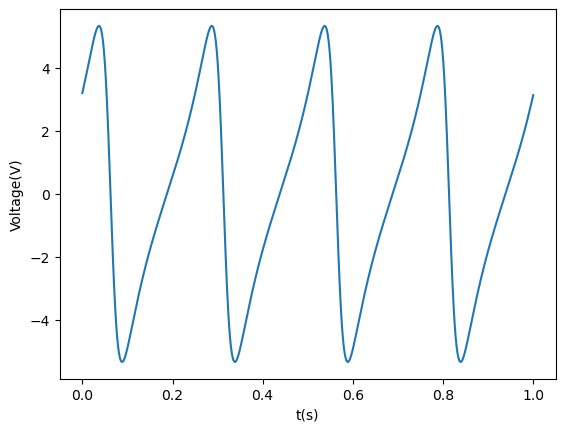

In [30]:
# import the data
data = np.loadtxt('prob4.txt')

# define constants
sample_rate = 1/1024
t = np.linspace(0, sample_rate * len(data), len(data))

# graph data
plt.figure()
plt.plot(t, data)
plt.ylabel('Voltage(V)')
plt.xlabel('t(s)')
plt.show()

In [31]:
# calculate Fourier transform of data
F = np.fft.fft(data)
F = np.fft.fftshift(F)

# calculate the frequency array
freq = np.fft.fftfreq(len(data), sample_rate)
freq = np.fft.fftshift(freq)
freq

array([-512., -511., -510., ...,  509.,  510.,  511.])

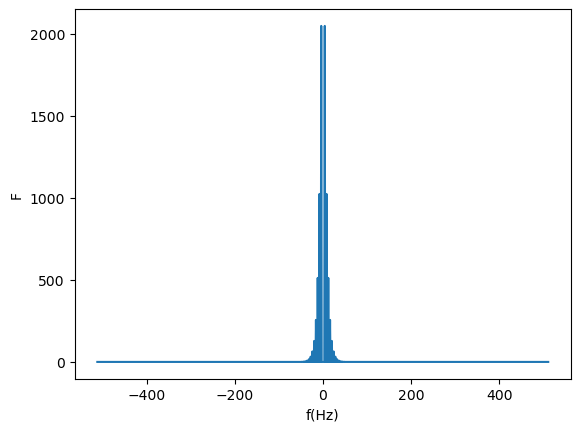

In [32]:
# graph the Fourier transform
plt.figure()
plt.plot(freq, np.abs(F))
plt.ylabel('F')
plt.xlabel('f(Hz)')
plt.show()

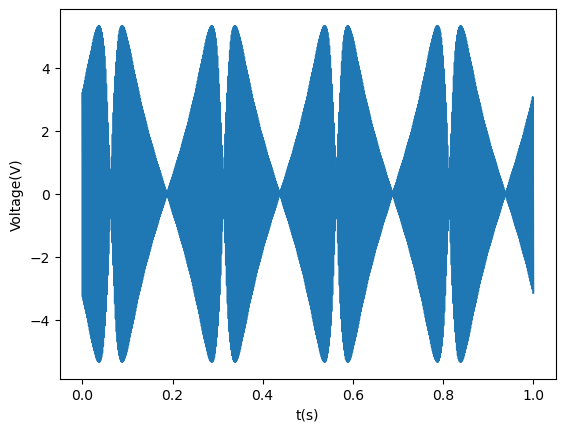

In [33]:
f = np.fft.ifft(F)
f = np.fft.fftshift(f)

# graph the filtered signal
plt.figure()
plt.plot(t, f)
plt.ylabel('Voltage(V)')
plt.xlabel('t(s)')
plt.show()